# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 54.0924, 'lat': 17.0151},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 27.05,
  'feels_like': 30.77,
  'temp_min': 27.05,
  'temp_max': 27.05,
  'pressure': 1014,
  'humidity': 89,
  'sea_level': 1014,
  'grnd_level': 1000},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 10},
 'rain': {'1h': 0.24},
 'clouds': {'all': 75},
 'dt': 1729883289,
 'sys': {'type': 1,
  'id': 7562,
  'country': 'OM',
  'sunrise': 1729822749,
  'sunset': 1729864557},
 'timezone': 14400,
 'id': 286621,
 'name': 'Salalah',
 'cod': 200}

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?' #lat={lat}&lon={lon}&appid={API key}'
units = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data # YOUR CODE HERE
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | holualoa
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | choibalsan
Processing Record 5 of Set 1 | ocean shores
Processing Record 6 of Set 1 | yuzhno-kurilsk
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | weno
Processing Record 9 of Set 1 | tucuma
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | pemangkat
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | east grand forks
Processing Record 15 of Set 1 | tineo
Processing Record 16 of Set 1 | tofol
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Set 1 | kichmengskiy gorodok
Proces

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,holualoa,19.6228,-155.9522,78.84,75,0,0.00,US,1729883146
1,bilibino,68.0546,166.4372,0.64,92,100,2.91,RU,1729883290
2,adamstown,-25.0660,-130.1015,69.24,75,100,17.13,PN,1729883291
3,choibalsan,48.0667,114.5000,32.22,41,100,4.61,MN,1729883293
4,ocean shores,46.9737,-124.1563,55.02,68,0,18.41,US,1729883294


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities2.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,78.84,75,0,0.00,US,1729883146
1,bilibino,68.0546,166.4372,0.64,92,100,2.91,RU,1729883290
2,adamstown,-25.0660,-130.1015,69.24,75,100,17.13,PN,1729883291
3,choibalsan,48.0667,114.5000,32.22,41,100,4.61,MN,1729883293
4,ocean shores,46.9737,-124.1563,55.02,68,0,18.41,US,1729883294


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

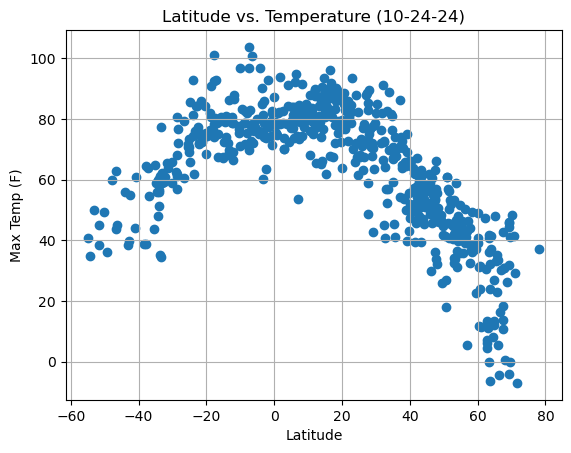

In [28]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

# Incorporate the other graph properties

plt.title('Latitude vs. Temperature (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

#show plot
plt.show()

#### Latitude Vs. Humidity

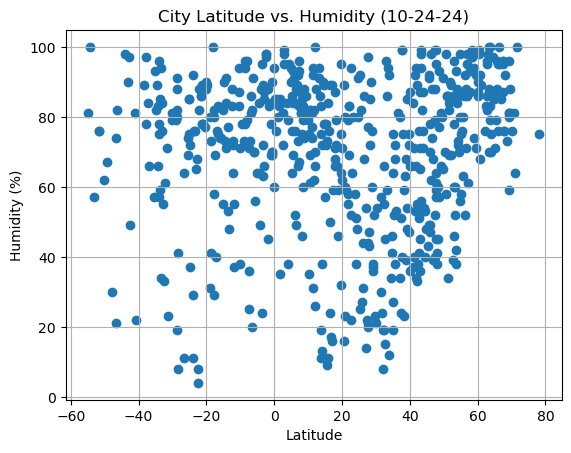

In [29]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

# Incorporate the other graph properties

plt.title('City Latitude vs. Humidity (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

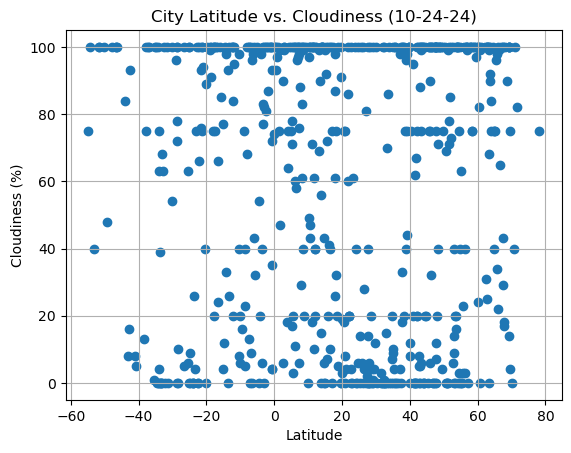

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties

plt.title('City Latitude vs. Cloudiness (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

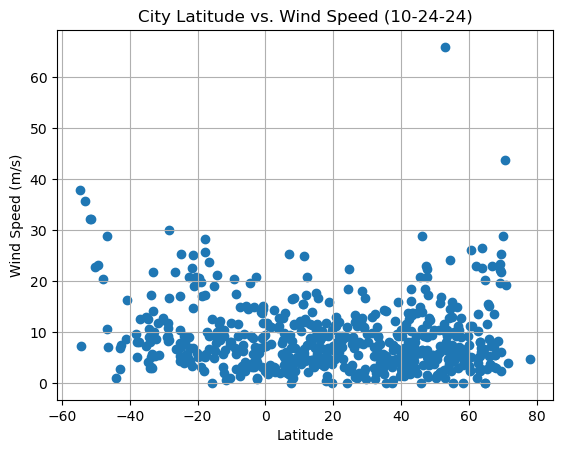

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties

plt.title('City Latitude vs. Wind Speed (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.01124420178413228


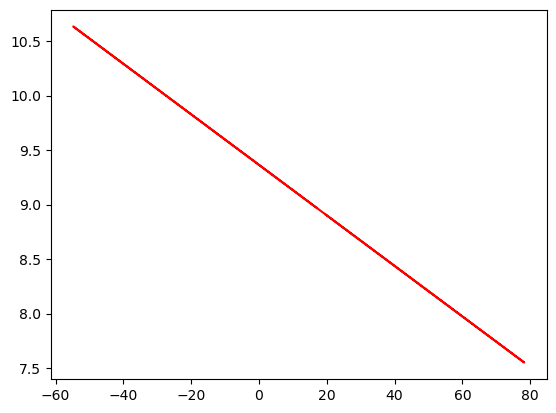

In [32]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")


In [33]:
#get northern hemi headers
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df.head()    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,78.84,75,0,0.00,US,1729883146
1,bilibino,68.0546,166.4372,0.64,92,100,2.91,RU,1729883290
3,choibalsan,48.0667,114.5000,32.22,41,100,4.61,MN,1729883293
4,ocean shores,46.9737,-124.1563,55.02,68,0,18.41,US,1729883294
5,yuzhno-kurilsk,44.0306,145.8556,52.11,87,0,8.10,RU,1729883295


The r-squared is: 0.7314566036996987


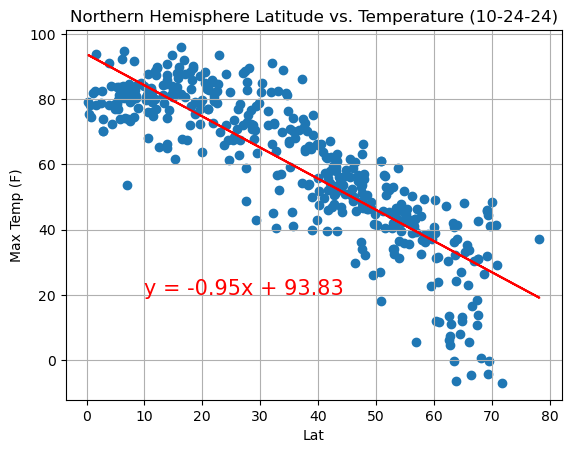

In [48]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.title('Northern Hemisphere Latitude vs. Temperature (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Max Temp (F)')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig5.png")
plt.show()

##Temperature vs. Latitude Linear Regression Plot

In [35]:
# Display sample data
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,78.84,75,0,0.00,US,1729883146
1,bilibino,68.0546,166.4372,0.64,92,100,2.91,RU,1729883290
3,choibalsan,48.0667,114.5000,32.22,41,100,4.61,MN,1729883293
4,ocean shores,46.9737,-124.1563,55.02,68,0,18.41,US,1729883294
5,yuzhno-kurilsk,44.0306,145.8556,52.11,87,0,8.10,RU,1729883295


The r-squared is: 0.5517938165242129


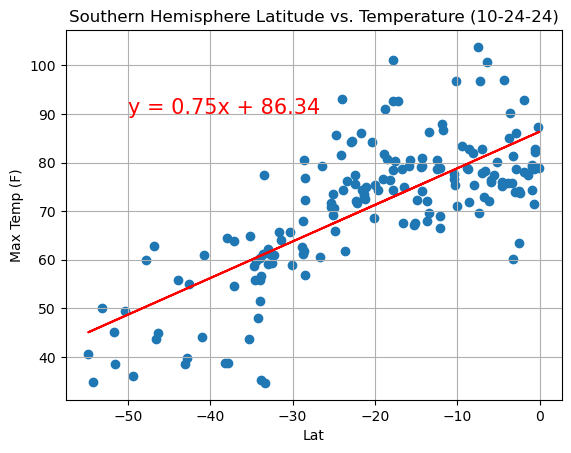

In [51]:
#Southern Hemisphere Lat and Temp
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]   
southern_hemi_df.head()


x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.title('Southern Hemisphere Latitude vs. Temperature (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Max Temp (F)')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90), fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** As the latitude increases, the maximum temperature also increases. This is a positive linear relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02970982648831094


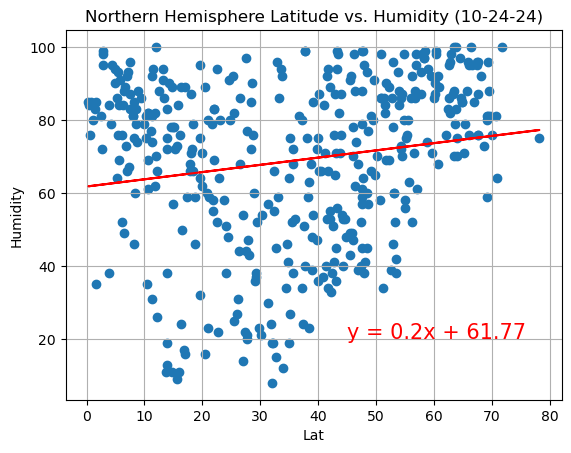

In [53]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.title('Northern Hemisphere Latitude vs. Humidity (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig7.png")
plt.show()

The r-squared is: 0.006287503317966732


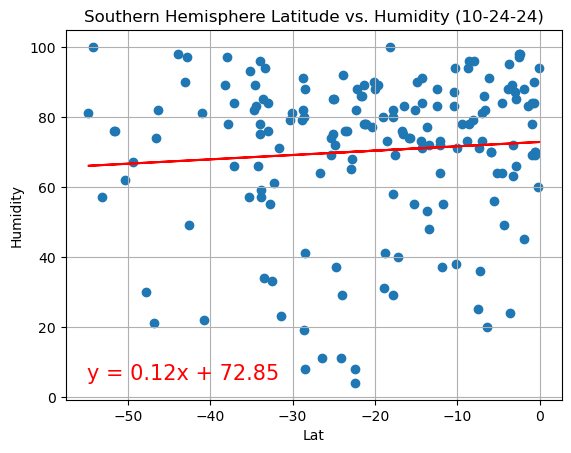

In [54]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.title('Southern Hemisphere Latitude vs. Humidity (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** There is a relatively flat relationship in the Southern hemisphere in regards to the latitude and the humidity. Most data points are at or above the 70% humidity point. There is a slight positive linear relationship, to almost no linear relationship

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.016259659524354337


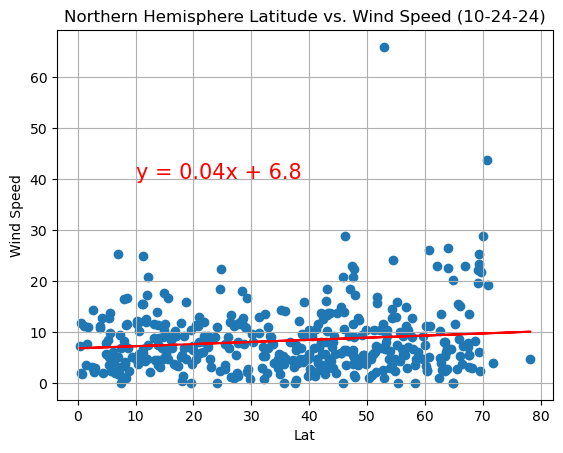

In [55]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.title('Northern Hemisphere Latitude vs. Wind Speed (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig9.png")
plt.show()

The r-squared is: 0.002484324430171546


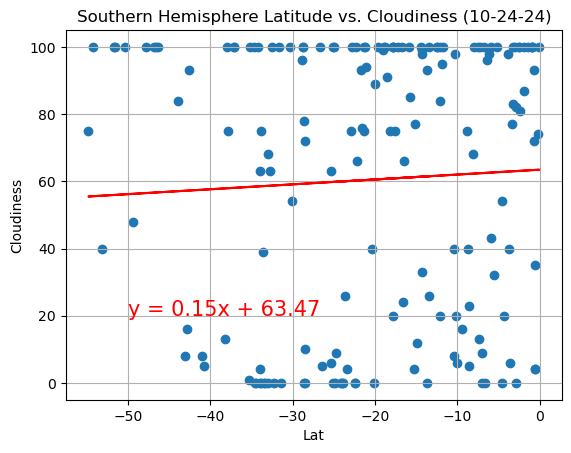

In [56]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.title('Southern Hemisphere Latitude vs. Cloudiness (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** There is a positive linear relationship, where an increase in latitude returns a higher level of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.016259659524354337


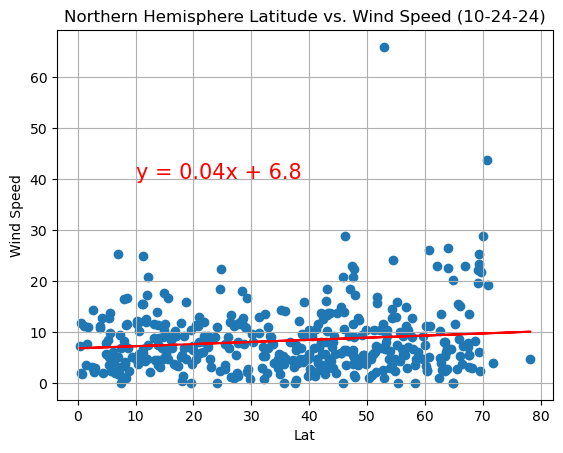

In [57]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.title('Northern Hemisphere Latitude vs. Wind Speed (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig11.png")
plt.show()

The r-squared is: 0.10323550245699781


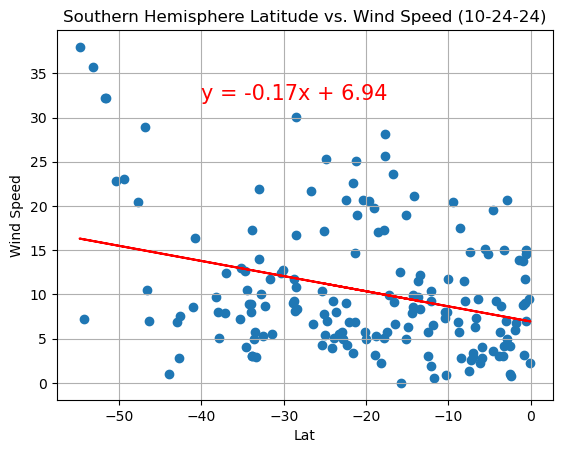

In [58]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.title('Southern Hemisphere Latitude vs. Wind Speed (10-24-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,32),fontsize=15,color="red")

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** There is a negative linear relationship where the increase in latitude returns a reduced wind speed. 